# XGBoost

## 乳がんデータセットを二値分類

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np 
import xgboost as xgb 

In [3]:
dataset = datasets.load_breast_cancer()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.7, test_size=0.3, shuffle=True, random_state=142, stratify=dataset.target)

In [18]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [23]:
xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
}
evals = [(dtrain, "train"), (dtest, "eval")]
evals_result = {}
bst = xgb.train(xgb_params, dtrain, num_boost_round=100, early_stopping_rounds=10, evals=evals, evals_result=evals_result)

[0]	train-logloss:0.45472	eval-logloss:0.51502
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 10 rounds.
[1]	train-logloss:0.32157	eval-logloss:0.42607
[2]	train-logloss:0.23674	eval-logloss:0.36060
[3]	train-logloss:0.17618	eval-logloss:0.30994
[4]	train-logloss:0.13571	eval-logloss:0.27520
[5]	train-logloss:0.10504	eval-logloss:0.25055
[6]	train-logloss:0.08231	eval-logloss:0.23684
[7]	train-logloss:0.06606	eval-logloss:0.22025
[8]	train-logloss:0.05392	eval-logloss:0.22201
[9]	train-logloss:0.04469	eval-logloss:0.21662
[10]	train-logloss:0.03741	eval-logloss:0.21489
[11]	train-logloss:0.03158	eval-logloss:0.21351
[12]	train-logloss:0.02701	eval-logloss:0.20518
[13]	train-logloss:0.02329	eval-logloss:0.20922
[14]	train-logloss:0.02089	eval-logloss:0.21014
[15]	train-logloss:0.01856	eval-logloss:0.21076
[16]	train-logloss:0.01704	eval-logloss:0.21129
[17]	train-logloss:0.01543	eval-logloss:0.216

In [24]:
y_pred = np.where(bst.predict(dtest) > 0.5, 1, 0)

In [25]:
accuracy_score(y_test, y_pred)

0.9122807017543859

In [26]:
from matplotlib import pyplot as plt

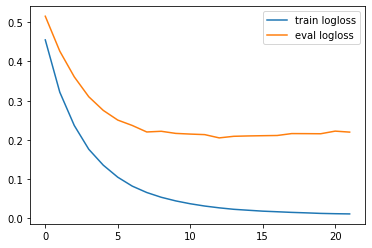

In [34]:
train_metric = evals_result["train"]["logloss"]
plt.plot(train_metric, label="train logloss")
eval_metric = evals_result["eval"]["logloss"]
plt.plot(eval_metric, label="eval logloss")
plt.legend()

In [35]:
# scikit-learn 互換の API
clf = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100)

In [37]:
evals_result = {}
clf.fit(X_train, y_train, 
        eval_metric="logloss", 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=10,
        callbacks=[xgb.callback.record_evaluation(evals_result)]
        )

[0]	validation_0-logloss:0.45472	validation_1-logloss:0.51502
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.32157	validation_1-logloss:0.42607
[2]	validation_0-logloss:0.23674	validation_1-logloss:0.36060
[3]	validation_0-logloss:0.17618	validation_1-logloss:0.30994
[4]	validation_0-logloss:0.13571	validation_1-logloss:0.27520
[5]	validation_0-logloss:0.10504	validation_1-logloss:0.25055
[6]	validation_0-logloss:0.08231	validation_1-logloss:0.23684
[7]	validation_0-logloss:0.06606	validation_1-logloss:0.22025
[8]	validation_0-logloss:0.05392	validation_1-logloss:0.22201
[9]	validation_0-logloss:0.04469	validation_1-logloss:0.21662
[10]	validation_0-logloss:0.03741	validation_1-logloss:0.21489
[11]	validation_0-logloss:0.03158	validation_1-logloss:0.21351
[12]	validation_0-logloss:0.02701	validation_1-logloss:0.20518
[13]	validation_0-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred = clf.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.9181286549707602

In [40]:
evals_result

{'validation_0': {'logloss': [0.454717,
   0.321567,
   0.236742,
   0.176176,
   0.135707,
   0.105041,
   0.082311,
   0.066064,
   0.053917,
   0.044689,
   0.037415,
   0.031582,
   0.027014,
   0.023292,
   0.020894,
   0.018564,
   0.01704,
   0.015432,
   0.014232,
   0.012843,
   0.012079,
   0.011533,
   0.010997]},
 'validation_1': {'logloss': [0.515018,
   0.426065,
   0.360604,
   0.309937,
   0.275205,
   0.250551,
   0.236842,
   0.220246,
   0.222012,
   0.21662,
   0.214889,
   0.213509,
   0.205183,
   0.209215,
   0.210144,
   0.210756,
   0.211292,
   0.216152,
   0.215992,
   0.215711,
   0.222399,
   0.219874,
   0.224436]}}

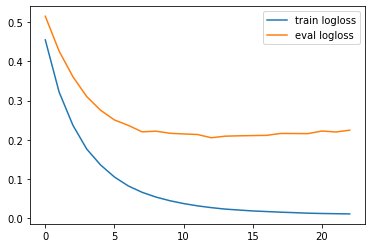

In [41]:
train_metric = evals_result["validation_0"]["logloss"]
plt.plot(train_metric, label="train logloss")
eval_metric = evals_result["validation_1"]["logloss"]
plt.plot(eval_metric, label="eval logloss")
plt.legend()